# 6.1 Классификация.Соискатели

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Отправьте результат нам

### Полезная литература

- [ODS - классификация](https://habrahabr.ru/company/ods/blog/322534/)
- [Коллаборативная фильтрация - рекомендательная система](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BB%D0%BB%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D0%B0%D1%8F_%D1%84%D0%B8%D0%BB%D1%8C%D1%82%D1%80%D0%B0%D1%86%D0%B8%D1%8F)
- [Метрики расстояний - косинусная, минковского, проклятье размерности ](http://www.machinelearning.ru/wiki/images/9/9a/Sem1_knn.pdf)
- [Offtop: метрики качества рекомендаьельных систем](https://habrahabr.ru/company/dca/blog/281066/)

## kNN - ближайшие соседи (15 баллов)

Рассмотрим задачу из соревнования [Amazon Employee Access Challenge](https://www.kaggle.com/c/amazon-employee-access-challenge).

В данной задаче предлагается предсказать, будет ли одобрен запрос сотрудника на получение доступа к тому или иному ресурсу. Все признаки являются категориальными.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv('../../data/amazon.csv.gz')
df.head()
# ACTION - это целевой признак

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


Обратим внимание, что выборка не сбалансированная. В качестве метрики качества будем использовть [f1-score](https://en.wikipedia.org/wiki/F1_score). 
$$F_1 = 2 \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}}$$

$$precision = \frac{TP}{TP+FP}$$

$$recall = \frac{TP}{TP+FN}$$

0.9421099209618847


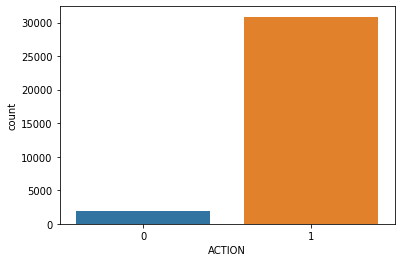

In [3]:
print(df['ACTION'].mean())
sns.countplot('ACTION', data=df)

In [4]:
# число значений у признаков
for col_name in df.columns:
    print(col_name, len(df[col_name].unique()))

ACTION 2
RESOURCE 7518
MGR_ID 4243
ROLE_ROLLUP_1 128
ROLE_ROLLUP_2 177
ROLE_DEPTNAME 449
ROLE_TITLE 343
ROLE_FAMILY_DESC 2358
ROLE_FAMILY 67
ROLE_CODE 343


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


# Baseline (4 балла)

Сразу проверим как ведет себя kNN на неподготовленных данных и без тюнинга. Зафиксируйте `n_neighbors=5`, `p=2`. 

- создайте экземпляр `KNeighborsClassifier` с указанными параметрами, обучите его методом `fit` и предскажите значения `predict` для треничровчных данных `X_test`.
- постройте отчет классификации (classification_report)
- постройте confusion matrix и нарисуйте heatmap

Обратите внимание на confusion matrix. Какой вывод вы можете сделать из неё? Вспомните лекцию и значение ошибок 1 и 2 рода.

In [6]:
X= df.drop(['ACTION'],axis=1)
y= df['ACTION']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [8]:
clf = KNeighborsClassifier(n_neighbors=5, p=2)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
y_pred = clf.predict(X_test).astype('int')

??? y_pred является на основе какого фолда?

??? Можно ли как то дообучать модели на новых данных или только обучать заново?

In [10]:
#отчет классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.09      0.14       614
           1       0.95      0.99      0.97     10200

    accuracy                           0.94     10814
   macro avg       0.64      0.54      0.55     10814
weighted avg       0.91      0.94      0.92     10814



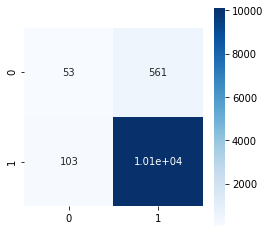

In [11]:
plt.figure(figsize=(4,4)) 
_ = sns.heatmap(confusion_matrix(y_test, y_pred), cmap=plt.cm.Blues, square=True, annot=True, fmt='.4g')

Выводы:
- плотность 0 очень низкая, соответственно f1 тоже низкая
- точность предсказания 0 очень нищкая

При фиксированном `n_neighbors=10` проверьте значение метрики на кроссвалидации на 5-фолдах для разных значений `p` из `(1,2,4,6)`. При каком значение `p` метрика достигает максимума?

При кроссвалидации у вас будет получаться N разных значений метрики. Выводите среднее значение и стандартное отклонение.

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
clf = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

%time scores = cross_val_score(clf, X, y, cv=cv)
print("Accuracy: {}".format(scores.mean()))

CPU times: user 3.14 s, sys: 21.3 ms, total: 3.16 s
Wall time: 3.16 s
Accuracy: 0.938570053032523


In [14]:
params = {
            "n_neighbors": [10], 
            "p": [1,2,4,6]
         }

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
search = GridSearchCV(KNeighborsClassifier(), params, cv=cv, verbose=2,n_jobs=-1)                    

%time search.fit(X, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


CPU times: user 227 ms, sys: 50.6 ms, total: 277 ms
Wall time: 25.5 s


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   25.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [10], 'p': [1, 2, 4, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [15]:
search.cv_results_

{'mean_fit_time': array([0.09889894, 0.09512191, 0.0965219 , 0.08610353]),
 'std_fit_time': array([0.0031923 , 0.00447507, 0.00715687, 0.00554227]),
 'mean_score_time': array([1.68142757, 1.34829464, 7.21701684, 6.76099696]),
 'std_score_time': array([0.06538145, 0.09844943, 0.34331234, 0.62246588]),
 'param_n_neighbors': masked_array(data=[10, 10, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_p': masked_array(data=[1, 2, 4, 6],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 10, 'p': 1},
  {'n_neighbors': 10, 'p': 2},
  {'n_neighbors': 10, 'p': 4},
  {'n_neighbors': 10, 'p': 6}],
 'split0_test_score': array([0.94003662, 0.93851083, 0.93957888, 0.93957888]),
 'split1_test_score': array([0.93927373, 0.93866341, 0.9394263 , 0.93896857]),
 'split2_test_score': array([0.94095209, 0.94140983, 0.94202014, 0.9423253 ]),
 'split3_test_score': 

In [16]:
round(search.cv_results_['split0_test_score'].mean(),8)

0.9394263

BEST: score=0.9403399785072131, params={'n_neighbors': 10, 'p': 4}


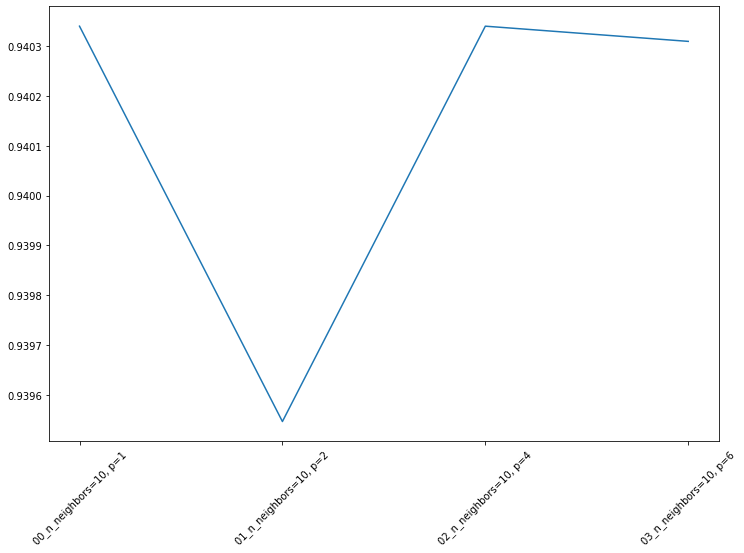

In [17]:
x_ticks = ["{:02d}_n_neighbors={}, p={}".format(i, p['n_neighbors'], p['p']) for i,p in enumerate(search.cv_results_['params'])]

plt.figure(figsize=(12,8))
plt.plot(x_ticks, search.cv_results_['mean_test_score'])
_ =plt.xticks(rotation=45)

print("BEST: score={}, params={}".format(search.best_score_, search.best_params_))

Отчет классификации стал еще хуже:

              precision    recall  f1-score   support

           0       0.25      0.03      0.05       614
           1       0.94      0.99      0.97     10200

    accuracy                           0.94     10814
   macro avg       0.60      0.51      0.51     10814
weighted avg       0.91      0.94      0.92     10814



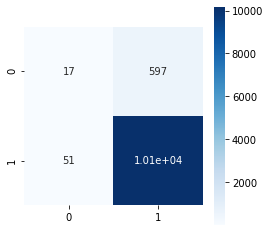

In [18]:
clf = KNeighborsClassifier(n_neighbors=search.best_params_['n_neighbors'], p=search.best_params_['p'])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test).astype('int')

print(classification_report(y_test, y_pred))

plt.figure(figsize=(4,4))
_ = sns.heatmap(confusion_matrix(y_test, y_pred), cmap=plt.cm.Blues, square=True, annot=True, fmt='.3g')

# Счетчики (6 баллов)

Очевидно, что предсказывать лейбл объекта, используя при этом метрический алгоритм на категориальных признаках - это ОЧЕНЬ странная затея. Не удивительно что качество ужасное. Необходимо каким-то образом заменить категориальные признаки вещественными:

- OneHotEncoding - это когда для каждого признака создают другие N бинарных признаков, где N - это количество категорий у категориального признака.
- Счетчики - об это написано в статье http://blogs.technet.com/b/machinelearning/archive/2015/02/17/big-learning-made-easy-with-counts.aspx.
- Еще https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/data-transformation-learning-with-counts
- Другие варианты энкодинга + счетчики https://kiwidamien.github.io/encoding-categorical-variables.html

Мы реализуем алгоритм Счетчиков. Его нет в sklearn, поэтому придется реализовать самому. 

Для каждого категориального признака создайте 3 других признака:
1. Число `counts` объектов в обучающей выборке с таким же значением признака.
2. Число `successes` объектов первого класса ($y = 1$) в обучающей выборке с таким же значением признака.
3. Сглаженное отношение двух предыдущих величин: (`successes` + 1) / (`counts` + 2).

Поскольку признаки, содержащие информацию о целевой переменной, могут привести к переобучению, может оказаться полезным сделать *фолдинг*: разбить обучающую выборку на $n$ частей, и для $i$-й части считать `counts` и `successes` по всем остальным частям. Для тестовой выборки используются счетчики, посчитанные по всей обучающей выборке. Реализуйте и такой вариант. Можно использовать $n = 3$.

Обучение надо проводить только по новым признакам. Изначальные мы не используем.

Подсказка - вам нужно для каждой колонки посчитать 2 аггрегации - сумму и количество. Для замены конкретного значения посчитанным используйте функцию apply над датафреймом. Простое решение займет около 10 строк кода.

![](http://images6.fanpop.com/image/photos/38600000/taiga-iamyourenemy-38620719-282-160.gif)

???

[Тут](https://kiwidamien.github.io/encoding-categorical-variables.html) указаны следующие параметры создания счетчиков. Что имеется ввиду под is_leftover?

The DRACuLa encoder isn't supported yet by category encoders. It is an interesting exercise to "roll your own". It is generally for classification problems. We are going to introduce the concept of "buckets": the most frequently occurring B levels get their own buckets. All other levels share the leftover bucket.

For binary classification, DRACuLa produces 4 columns:

    N+: the number of times the positive class has been seen in this bucket,
    N-: the number of times the negative class has been seen in this bucket,
    log(N+/N-): the log likelihood,
    is_leftover: boolean, indicating if this was one of the B levels that got its own bucket (False), or if we were in the "leftover" bucket (True)


In [19]:
df5 = df.iloc[41:56][['ACTION','ROLE_FAMILY']]
df5

,ACTION,ROLE_FAMILY
41,0,118638
42,1,290919
43,1,308574
44,1,308574
45,1,118295
46,1,290919
47,1,118643
48,1,118960
49,1,19721
50,1,119221


In [20]:
XX= df5.drop(['ACTION'],axis=1)
yy= df5['ACTION']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(XX, yy, random_state=42, test_size=0.3, stratify=yy)

In [22]:
X_train

,ROLE_FAMILY
55,19721
43,308574
50,119221
42,290919
51,118331
54,290919
47,118643
53,290919
48,118960
44,308574


In [23]:
X_train_split = int(X_train.shape[0]*0.7)
X_train_split

7

In [24]:
X_train.iloc[:X_train_split]

,ROLE_FAMILY
55,19721
43,308574
50,119221
42,290919
51,118331
54,290919
47,118643


In [25]:
X_train.iloc[X_train_split:]

,ROLE_FAMILY
53,290919
48,118960
44,308574


??? Что делать, есть значение(308574) категориального признака не встречалось в части тренеровочной выборки, где подсчет мы производили на основании целевого признака?

In [205]:
def CountAndSuccCalc(df, df_counts, col_name, method=1):
      
    if (1==method):
        c = df[col_name].apply(lambda value: df_counts[value].sum()) #сумма встречающихся значений 0 и 1, по сути количество категории
        s = df[col_name].apply(lambda value: df_counts[value].iloc[1]) #количество значения категории при у=1
        f = (s+1)/(c+2)
        out = [c,s,f]
    if (2==method):
        c = df[col_name].apply(lambda value: df_counts[value].sum()) #сумма встречающихся значений 0 и 1, по сути количество категории
        s = df[col_name].apply(lambda value: df_counts[value].iloc[1]) #количество значения категории при у=1
        n = c-s #количество значения категории при у=0
        f = np.log((s+1)/(n+1)) 
        #??? По умолчанию все элементы с количеством меньше 10 собираются в одном контейнере, называемом «мусорное ведро».
        out = [c,s,n,f]
        
    return out

In [279]:
def CountAndSuccMain (df, train_part_by_target_size=0.7, y_name = 'ACTION', method=1):
    '''
    train_part_by_target_size - пропорция от общего числа тренеровочной выборки, у которой counts и successes будут 
                    строится по целевому признаку, остальные части на основании train_part_by_target_size.
                    Если == 1, то вторая часть тренеровочной выборке буде считаться тоже по целевому признаку
    '''
    
    #Создаю новые признаки и наполняю их NaN, далее буду считать точные значения
    col_names = df.columns
    for col_name in col_names:
        if col_name == y_name:
            continue
        if (1==method):
            df[col_name+'_count'], df[col_name+'_successes'], df[col_name+'_flattened'] = list(3*[np.NaN])
        if (2==method):
            df[col_name+'_count'], df[col_name+'_successes'], df[col_name+'_not_successes'], df[col_name+'_flattened'] = list(4*[np.NaN])
 
    X_train, X_test, y_train, y_test = train_test_split(df.drop([y_name],axis=1), df[y_name], random_state=42, test_size=0.3, stratify=df[y_name])
    
    X_train_spliter = int(X_train.shape[0]*train_part_by_target_size)# Индекс-разделитель тренеровочной выборки на 2 части
    X_train_by_target = X_train.iloc[:X_train_spliter] # Новые признаки будут строиться на основе целевого
    X_train = X_train.iloc[X_train_spliter:] # Новые признаки будут строиться на основе X_train_by_target
       
    #Счетчики для первой части тренеровочной выборки
    for col_name in col_names:
        if col_name == y_name:
            continue
                    #формирую новую выборку с целевой переменной,на основе индексов train_test_split, чтобы произвести рассчеты    
        df_counts = pd.DataFrame(index=X_train_by_target.index, data=df).groupby([y_name,col_name])[col_name].count().unstack().fillna(0)# группирую данные в таблицу, где именования столбцов это уникальные значения col_name, а в строках количество повторений при у = [0,1] 
        if (1==method):
            X_train_by_target[col_name+'_count'], X_train_by_target[col_name+'_successes'], X_train_by_target[col_name+'_flattened'] = CountAndSuccCalc(X_train_by_target,df_counts,col_name)  
        if (2==method):
            X_train_by_target[col_name+'_count'], X_train_by_target[col_name+'_successes'], X_train_by_target[col_name+'_not_successes'], X_train_by_target[col_name+'_flattened'] = CountAndSuccCalc(X_train_by_target,df_counts,col_name, 2)  
  
    #Счетчики на основе первой части тренеровочной выборки
    for col_name in col_names:
        if col_name == y_name:
            continue
        
        if X_train.shape[0] > 0: #Если есть втроая часть тренеровочной выборки (train_part_by_target_size<1)
            for value in X_train[col_name].unique():#Счетчики для второй части тренеровочной выборки на основе первой части     
                if value in X_train_by_target[col_name].values: # Если в первой части тренеровочной выборки существует значение из второй части тренеровочной выборки
                    if (1==method):
                        X_train.loc[X_train[col_name] == value,[col_name+'_count',col_name+'_successes',col_name+'_flattened']] = X_train_by_target.loc[X_train_by_target[col_name] == value,[col_name+'_count',col_name+'_successes',col_name+'_flattened']][:1].values[0]                
                    if (2==method):
                        X_train.loc[X_train[col_name] == value,[col_name+'_count',col_name+'_successes',col_name+'_not_successes',col_name+'_flattened']] = X_train_by_target.loc[X_train_by_target[col_name] == value,[col_name+'_count',col_name+'_successes',col_name+'_not_successes',col_name+'_flattened']][:1].values[0]                
        
        for value in X_test[col_name].unique(): #Счетчики для тестовой выборки на основе первой части тренеровочной выборки
            if value in X_train_by_target[col_name].values: # Если в первой части тренеровочной выборки существует значение из тестовой выборки
                if (1==method):
                    X_test.loc[X_test[col_name] == value,[col_name+'_count',col_name+'_successes',col_name+'_flattened']] = X_train_by_target.loc[X_train_by_target[col_name] == value,[col_name+'_count',col_name+'_successes',col_name+'_flattened']][:1].values[0]                
                if (2==method):
                    X_test.loc[X_test[col_name] == value,[col_name+'_count',col_name+'_successes',col_name+'_not_successes',col_name+'_flattened']] = X_train_by_target.loc[X_train_by_target[col_name] == value,[col_name+'_count',col_name+'_successes',col_name+'_not_successes',col_name+'_flattened']][:1].values[0]                

    
    #print('------------ train_part_one:\n\n{}'.format(X_train_by_target))
    #print('\n------------ train_part_two:\n\n{}'.format(X_train))
    #print('\n------------ test:\n\n{}'.format(X_test))
    X_train = pd.concat([X_train_by_target,X_train])
    return X_train[np.setdiff1d(X_train.columns,col_names)], X_test[np.setdiff1d(X_test.columns,col_names)], y_train, y_test

??? Есть инструмент дебага в ноутбуке?

??? Почему df5 заменяется? он же внутри процедуры. Или я передаю глобальную переменную?

In [122]:
df5 = df.iloc[41:56][['ACTION','ROLE_FAMILY']]
df5

,ACTION,ROLE_FAMILY
41,0,118638
42,1,290919
43,1,308574
44,1,308574
45,1,118295
46,1,290919
47,1,118643
48,1,118960
49,1,19721
50,1,119221


In [150]:
X_train, X_test, y_train, y_test = CountAndSuccMain(df5)

In [93]:
#df = pd.read_csv('../../data/amazon.csv.gz')

In [293]:
X_train, X_test, y_train, y_test = CountAndSuccMain(df.copy(), 1, method=2)

In [294]:
X_train.isnull().sum()

MGR_ID_count                      0
MGR_ID_flattened                  0
MGR_ID_not_successes              0
MGR_ID_successes                  0
RESOURCE_count                    0
RESOURCE_flattened                0
RESOURCE_not_successes            0
RESOURCE_successes                0
ROLE_CODE_count                   0
ROLE_CODE_flattened               0
ROLE_CODE_not_successes           0
ROLE_CODE_successes               0
ROLE_DEPTNAME_count               0
ROLE_DEPTNAME_flattened           0
ROLE_DEPTNAME_not_successes       0
ROLE_DEPTNAME_successes           0
ROLE_FAMILY_DESC_count            0
ROLE_FAMILY_DESC_flattened        0
ROLE_FAMILY_DESC_not_successes    0
ROLE_FAMILY_DESC_successes        0
ROLE_FAMILY_count                 0
ROLE_FAMILY_flattened             0
ROLE_FAMILY_not_successes         0
ROLE_FAMILY_successes             0
ROLE_ROLLUP_1_count               0
ROLE_ROLLUP_1_flattened           0
ROLE_ROLLUP_1_not_successes       0
ROLE_ROLLUP_1_successes     

In [295]:
X_test.isnull().sum()

MGR_ID_count                       446
MGR_ID_flattened                   446
MGR_ID_not_successes               446
MGR_ID_successes                   446
RESOURCE_count                    1430
RESOURCE_flattened                1430
RESOURCE_not_successes            1430
RESOURCE_successes                1430
ROLE_CODE_count                     23
ROLE_CODE_flattened                 23
ROLE_CODE_not_successes             23
ROLE_CODE_successes                 23
ROLE_DEPTNAME_count                 13
ROLE_DEPTNAME_flattened             13
ROLE_DEPTNAME_not_successes         13
ROLE_DEPTNAME_successes             13
ROLE_FAMILY_DESC_count             310
ROLE_FAMILY_DESC_flattened         310
ROLE_FAMILY_DESC_not_successes     310
ROLE_FAMILY_DESC_successes         310
ROLE_FAMILY_count                    4
ROLE_FAMILY_flattened                4
ROLE_FAMILY_not_successes            4
ROLE_FAMILY_successes                4
ROLE_ROLLUP_1_count                  5
ROLE_ROLLUP_1_flattened  

??? Что делать с нуллами?

In [296]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
pass

Проверьте какое качество теперь получается на кроссвалидации для новых данных.

??? Не понял как сделать кросс валидацию, если у меня уже выборка разбита, или что имеется ввиду под новыми данными? Собрать данные обратно в 1 датафрейм?

In [357]:
params = {
    "n_neighbors": np.arange(2, 8), 
    "p": [1,2,3,4]
}

search = GridSearchCV(KNeighborsClassifier(), params, n_jobs=2, 
                      cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), verbose=2)
#%time search.fit(pd.concat([X_train,X_test]), pd.concat([y_train,y_test]))
%time search.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:  4.7min finished


CPU times: user 1.21 s, sys: 64.3 ms, total: 1.28 s
Wall time: 4min 42s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=2,
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7]),
                         'p': [1, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [362]:
print("BEST: score={}, params={}".format(search.best_score_, search.best_params_))

BEST: score=0.9486877550349353, params={'n_neighbors': 3, 'p': 1}


In [363]:
clf = KNeighborsClassifier(n_neighbors=3, p=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')

In [364]:
y_pred = clf.predict(X_train).astype('int')

In [365]:
#отчет классификации
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.58      0.68      1328
           1       0.97      0.99      0.98     21610

    accuracy                           0.97     22938
   macro avg       0.90      0.79      0.83     22938
weighted avg       0.97      0.97      0.97     22938



??? При других параметрах получается лучший результат предсказания на тестовой выборке {7,1}

??? Есть аналог GridSearchCV но чтобы предсказывать данные с разными параметрами?

In [380]:
clf = KNeighborsClassifier(n_neighbors=3, p=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')

In [381]:
y_pred = clf.predict(X_test).astype('int')

- постройте отчет классификации (classification_report)
- постройте confusion matrix и нарисуйте heatmap

Оцените на сколько улучшилось качество.

In [382]:
#отчет классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.34      0.42       569
           1       0.96      0.98      0.97      9262

    accuracy                           0.95      9831
   macro avg       0.76      0.66      0.70      9831
weighted avg       0.94      0.95      0.94      9831



In [372]:
#отчет классификации n_neighbors=3, p=1
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.34      0.42       569
           1       0.96      0.98      0.97      9262

    accuracy                           0.95      9831
   macro avg       0.76      0.66      0.70      9831
weighted avg       0.94      0.95      0.94      9831



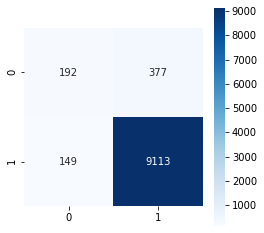

In [383]:
plt.figure(figsize=(4,4)) 
_ = sns.heatmap(confusion_matrix(y_test, y_pred), cmap=plt.cm.Blues, square=True, annot=True, fmt='.4g')

??? Почему меняется сумма 0 и 1?

# Co-co-co-combo (5 баллов)

Добавьте в исходную выборку парные признаки — то есть для каждой пары $(f_i, f_j)$, $i < j$ исходных категориальных признаков добавьте новый категориальный признак $f_{ij}$, значение которого является конкатенацией значений $f_i$ и $f_j$ (желательно через какой-нибудь специальный символ во избежание коллизий). Посчитайте счетчики для этой выборки, найдите качество метода $k$ ближайших соседей с наилучшим $k$ (с фолдингом и без).

In [267]:
df_combo = df.copy()
df_combo.isnull().sum()

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [268]:
def generate_pair_features(df, y_name, separator = '#'):

    columns_df = list(df.columns)
    columns_df.remove(y_name)

    for col_name in columns_df:

        columns_pair = columns_df[:] 
        columns_pair.remove(col_name)
    
        for col_pair_name in columns_pair:
            
            new_col_name = col_name+separator+col_pair_name
            new_col_name_revers = col_pair_name+separator+col_name
            if new_col_name_revers in list(df.columns): #Если столбец с обратной парой уже существует, то пропускаем
                continue
            else:
                df[new_col_name] = df.apply((lambda x: '{}{}{}'.format(x[col_name],separator,x[col_pair_name])), axis=1)
    
    return df

In [269]:
%%time
df_combo = generate_pair_features(df_combo, 'ACTION')

CPU times: user 1min 5s, sys: 147 ms, total: 1min 5s
Wall time: 1min 5s


In [270]:
df_combo.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,...,ROLE_DEPTNAME#ROLE_TITLE,ROLE_DEPTNAME#ROLE_FAMILY_DESC,ROLE_DEPTNAME#ROLE_FAMILY,ROLE_DEPTNAME#ROLE_CODE,ROLE_TITLE#ROLE_FAMILY_DESC,ROLE_TITLE#ROLE_FAMILY,ROLE_TITLE#ROLE_CODE,ROLE_FAMILY_DESC#ROLE_FAMILY,ROLE_FAMILY_DESC#ROLE_CODE,ROLE_FAMILY#ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908,...,123472#117905,123472#117906,123472#290919,123472#117908,117905#117906,117905#290919,117905#117908,117906#290919,117906#117908,290919#117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539,...,123125#118536,123125#118536,123125#308574,123125#118539,118536#118536,118536#308574,118536#118539,118536#308574,118536#118539,308574#118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880,...,117884#117879,117884#267952,117884#19721,117884#117880,117879#267952,117879#19721,117879#117880,267952#19721,267952#117880,19721#117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322,...,119993#118321,119993#240983,119993#290919,119993#118322,118321#240983,118321#290919,118321#118322,240983#290919,240983#118322,290919#118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325,...,119569#119323,119569#123932,119569#19793,119569#119325,119323#123932,119323#19793,119323#119325,123932#19793,123932#119325,19793#119325


In [271]:
df_combo.columns

Index(['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE', 'RESOURCE#MGR_ID', 'RESOURCE#ROLE_ROLLUP_1',
       'RESOURCE#ROLE_ROLLUP_2', 'RESOURCE#ROLE_DEPTNAME',
       'RESOURCE#ROLE_TITLE', 'RESOURCE#ROLE_FAMILY_DESC',
       'RESOURCE#ROLE_FAMILY', 'RESOURCE#ROLE_CODE', 'MGR_ID#ROLE_ROLLUP_1',
       'MGR_ID#ROLE_ROLLUP_2', 'MGR_ID#ROLE_DEPTNAME', 'MGR_ID#ROLE_TITLE',
       'MGR_ID#ROLE_FAMILY_DESC', 'MGR_ID#ROLE_FAMILY', 'MGR_ID#ROLE_CODE',
       'ROLE_ROLLUP_1#ROLE_ROLLUP_2', 'ROLE_ROLLUP_1#ROLE_DEPTNAME',
       'ROLE_ROLLUP_1#ROLE_TITLE', 'ROLE_ROLLUP_1#ROLE_FAMILY_DESC',
       'ROLE_ROLLUP_1#ROLE_FAMILY', 'ROLE_ROLLUP_1#ROLE_CODE',
       'ROLE_ROLLUP_2#ROLE_DEPTNAME', 'ROLE_ROLLUP_2#ROLE_TITLE',
       'ROLE_ROLLUP_2#ROLE_FAMILY_DESC', 'ROLE_ROLLUP_2#ROLE_FAMILY',
       'ROLE_ROLLUP_2#ROLE_CODE', 'ROLE_DEPTNAME#ROLE_TITLE',
       'ROLE_DEPTNAME#ROLE_FAMILY_DESC', 'R

In [280]:
%%time
X_train, X_test, y_train, y_test = CountAndSuccMain(df_combo.copy(), 1, method=1)

CPU times: user 16min 41s, sys: 1.07 s, total: 16min 42s
Wall time: 16min 41s


In [281]:
X_train.columns

Index(['MGR_ID#ROLE_CODE_count', 'MGR_ID#ROLE_CODE_flattened',
       'MGR_ID#ROLE_CODE_successes', 'MGR_ID#ROLE_DEPTNAME_count',
       'MGR_ID#ROLE_DEPTNAME_flattened', 'MGR_ID#ROLE_DEPTNAME_successes',
       'MGR_ID#ROLE_FAMILY_DESC_count', 'MGR_ID#ROLE_FAMILY_DESC_flattened',
       'MGR_ID#ROLE_FAMILY_DESC_successes', 'MGR_ID#ROLE_FAMILY_count',
       ...
       'ROLE_TITLE#ROLE_CODE_successes', 'ROLE_TITLE#ROLE_FAMILY_DESC_count',
       'ROLE_TITLE#ROLE_FAMILY_DESC_flattened',
       'ROLE_TITLE#ROLE_FAMILY_DESC_successes', 'ROLE_TITLE#ROLE_FAMILY_count',
       'ROLE_TITLE#ROLE_FAMILY_flattened', 'ROLE_TITLE#ROLE_FAMILY_successes',
       'ROLE_TITLE_count', 'ROLE_TITLE_flattened', 'ROLE_TITLE_successes'],
      dtype='object', length=135)

In [282]:
X_test.isnull().sum()

MGR_ID#ROLE_CODE_count              1060
MGR_ID#ROLE_CODE_flattened          1060
MGR_ID#ROLE_CODE_successes          1060
MGR_ID#ROLE_DEPTNAME_count           606
MGR_ID#ROLE_DEPTNAME_flattened       606
                                    ... 
ROLE_TITLE#ROLE_FAMILY_flattened      23
ROLE_TITLE#ROLE_FAMILY_successes      23
ROLE_TITLE_count                      23
ROLE_TITLE_flattened                  23
ROLE_TITLE_successes                  23
Length: 135, dtype: int64

In [283]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
pass

In [286]:
params = {
    "n_neighbors": np.arange(2, 10, 2), 
    "p": [1,4]
}

search = GridSearchCV(KNeighborsClassifier(), params, n_jobs=2, 
                      cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), verbose=2)
%time search.fit(pd.concat([X_train,X_test]), pd.concat([y_train,y_test]))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  9.3min
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed: 10.9min finished


CPU times: user 1.44 s, sys: 109 ms, total: 1.55 s
Wall time: 10min 53s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=2,
             param_grid={'n_neighbors': array([2, 4, 6, 8]), 'p': [1, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [288]:
print("BEST: score={}, params={}".format(search.best_score_, search.best_params_))

BEST: score=0.9459550750736432, params={'n_neighbors': 6, 'p': 1}


In [289]:
clf = KNeighborsClassifier(n_neighbors=6, p=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=1,
                     weights='uniform')

In [290]:
y_pred = clf.predict(X_test).astype('int')

- постройте отчет классификации (classification_report)
- постройте confusion matrix и нарисуйте heatmap

Оцените на сколько улучшилось качество. Не похоже ли это на переобусение?

Внимание! Обучение на этом этапе может быть долгим. На i5 16GB кроссвалидация на 5 фолдах заняла 30 минут!

In [291]:
#отчет классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.36      0.44       569
           1       0.96      0.98      0.97      9262

    accuracy                           0.95      9831
   macro avg       0.76      0.67      0.71      9831
weighted avg       0.94      0.95      0.94      9831



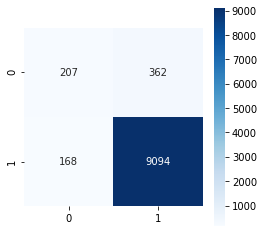

In [292]:
plt.figure(figsize=(4,4)) 
_ = sns.heatmap(confusion_matrix(y_test, y_pred), cmap=plt.cm.Blues, square=True, annot=True, fmt='.4g')